In [1]:
dataset = pd.read_csv("new_data_urls.csv") 
cleaned_data = df.drop_duplicates()
cleaned_data.to_csv("cleaned_dataset.csv", index=False)
print("✅ Duplicates removed successfully! Cleaned dataset saved as 'cleaned_dataset.csv'.")


✅ Duplicates removed successfully! Cleaned dataset saved as 'cleaned_dataset.csv'.


In [2]:
!pip install python-whois


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from urllib.parse import urlparse
from datetime import datetime
phish_words = ["login", "verify", "bank", "secure", "account", "update", 
                     "password", "confirm", "payment", "signin", "ebayisapi", 
                     "webscr", "activation", "security", "free", "win", "prize"]
rare_domains = ['.xyz', '.online', '.top', '.info', '.biz']

def extract_features(url):
    """Extract features from a given URL."""
    details = {}
    parsed_url = urlparse(url)
    features['url_length'] = len(url)                        
    features['num_dots'] = url.count('.')                    
    features['num_parameters'] = url.count('?') + url.count('&')  
    features['num_encoded_chars'] = len(re.findall(r'%[0-9A-Fa-f]{2}', url))  
    for char in ['@', '-', '_', '=', '&', '?']:
        features[f'count_{char}'] = url.count(char)
    digits = sum(c.isdigit() for c in url)
    letters = sum(c.isalpha() for c in url)
    features['digit_to_letter_ratio'] = digits / (letters + 1)  
    hostname = parsed_url.hostname if parsed_url.hostname else ""
    subdomains = hostname.split('.')[:-2] if len(hostname.split('.')) > 2 else []
    features['subdomain_length'] = sum(len(sub) for sub in subdomains)

    ip_pattern = re.compile(r'(\d{1,3}\.){3}\d{1,3}')
    features['is_ip'] = 1 if ip_pattern.fullmatch(hostname) else 0
    features['phishing_keyword'] = int(any(keyword in url.lower() for keyword in phish_words))
    def get_domain_age(domain, timeout=5):
        try:
            w = whois.whois(domain, timeout=timeout)
            creation_date = w.creation_date
            if isinstance(creation_date, list):  
                creation_date = creation_date[0]  
            return (datetime.now() - creation_date).days if creation_date else -1
        except Exception:
            return -1 

    features['domain_age'] = get_domain_age(hostname)

    features['has_uncommon_tld'] = int(any(url.endswith(tld) for tld in rare_domains))

    return features
dataset = pd.read_csv("cleaned_dataset.csv")
features_dataset = df["url"].apply(lambda url: extract_features(url)).apply(pd.Series)
final_data = pd.concat([df, url_features], axis=1)
if 'status' in final_data.columns:
    final_data.drop('status', axis=1, inplace=True)
final_data.drop_duplicates(inplace=True)
final_data.to_csv("enhanced_dataset.csv", index=False)

print("✅ Feature extraction completed! Enhanced dataset saved as 'enhanced_dataset.csv'.")


In [4]:
from urllib.parse import urlparse
suspicious_words = ["free", "win", "prize", "urgent", "claim", "reward", "click", "bonus"]
popular_brands = ["paypal", "amazon", "facebook", "google", "apple", "microsoft"]

def extract_features(url):
    """Extract improved phishing features from a given URL."""
    details = {}
    parsed_url = urlparse(url)
    features['suspicious_word_count'] = sum(word in url.lower() for word in suspicious_words)
    features['brand_imitation'] = sum(brand in url.lower() for brand in popular_brands)
    features['path_length'] = len(parsed_url.path)
    features['encoded_characters'] = len(re.findall(r'%[0-9A-Fa-f]{2}', url))
    features['num_subdirectories'] = parsed_url.path.count('/')
    features['has_redirection'] = 1 if '//' in parsed_url.path[1:] else 0
    suspicious_extensions = ['.php', '.exe', '.zip', '.jar']
    features['suspicious_extension'] = int(any(url.lower().endswith(ext) for ext in suspicious_extensions))
    features['has_at_symbol'] = 1 if '@' in url.split('/')[0] else 0
    features['https_present'] = 1 if parsed_url.scheme == 'https' else 0
    features['has_port'] = 1 if ':' in parsed_url.netloc else 0
    
    return features
dataset = pd.read_csv("enhanced_dataset.csv")
new_features_dataset = df['url'].apply(lambda url: extract_features(url)).apply(pd.Series)
final_data = pd.concat([df, new_url_features], axis=1)
final_data.to_csv("enhanced56.csv", index=False)
print("✅ Enhanced dataset created successfully!")


✅ Enhanced dataset created successfully!


In [8]:
dataset = pd.read_csv("enhanced56.csv")
columns_to_remove = ['domain_age', 'has_at_symbol', 'has_port', 'has_redirection','path_length','encoded_characters']
df.drop(columns=columns_to_remove, axis=1, inplace=True)
df.to_csv("enhanced87.csv", index=False)
print("✅ Unwanted columns removed successfully! Saved as 'enhanced87.csv'.")


✅ Unwanted columns removed successfully! Saved as 'enhanced87.csv'.


In [9]:
dataset = pd.read_csv("enhanced87.csv") 
print("✅ Column Names in Dataset:")
print(df.columns.tolist())


✅ Column Names in Dataset:
['url', 'url_length', 'num_dots', 'num_parameters', 'num_encoded_chars', 'count_@', 'count_-', 'count__', 'count_=', 'count_&', 'count_?', 'digit_to_letter_ratio', 'subdomain_length', 'is_ip', 'phishing_keyword', 'has_uncommon_tld', 'suspicious_word_count', 'brand_imitation', 'num_subdirectories', 'suspicious_extension', 'https_present']


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dataset = pd.read_csv('main_dataset_with_status.csv') 
def calculate_phishing_score(row):
    score = 0
    score += 0.1 if row['url_length'] > 75 else 0
    score += 0.1 * row['num_dots']
    score += 0.5 * (row['count_@'] + row['count_-'] + row['count_='] + row['count_&'] + row['count_?'])
    score += 0.1 if row['digit_to_letter_ratio'] > 0.5 else 0
    score += 0.1 if row['subdomain_length'] > 20 else 0
    score += 0.2 if row['is_ip'] else 0
    score += 0.1 * row['phishing_keyword']
    score += 0.1 if row['has_uncommon_tld'] else 0
    score += 0.1 * row['suspicious_word_count']
    score += 0.78 * row['brand_imitation']
    score += 0.05 * row['num_subdirectories']
    score += 0.61 if row['suspicious_extension'] else 0
    score += -0.1 if row['https_present'] else 0

    return min(score, 1.0)
df['phishing_score'] = df.apply(calculate_phishing_score, axis=1)

threshold = 0.5 
df['predicted_status'] = (df['phishing_score'] >= threshold).astype(int)
print("✅ Accuracy:", accuracy_score(df['status'], df['predicted_status']))
print("\n📊 Confusion Matrix:\n", confusion_matrix(df['status'], df['predicted_status']))
print("\n📋 Classification Report:\n", classification_report(df['status'], df['predicted_status']))
df.to_csv("phishing_with_scores.csv", index=False)


✅ Accuracy: 0.5129114575727499

📊 Confusion Matrix:
 [[257608 123406]
 [270182 156846]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.68      0.57    381014
           1       0.56      0.37      0.44    427028

    accuracy                           0.51    808042
   macro avg       0.52      0.52      0.51    808042
weighted avg       0.53      0.51      0.50    808042



In [4]:
df1 = pd.read_csv("enhanced87.csv")       
df2 = pd.read_csv("cleaned_dataset.csv")    
if len(df1) != len(df2):
    raise ValueError("Datasets have different number of rows. Cannot safely add 'status' column.")
df1['status'] = df2['status'].values
df1.to_csv("main_dataset_with_status.csv", index=False)


In [1]:
!pip install xgboost

                                              0.0/150.0 MB ? eta -:--:--
                                              0.1/150.0 MB 1.5 MB/s eta 0:01:39
                                              0.2/150.0 MB 2.5 MB/s eta 0:01:01
                                              0.4/150.0 MB 3.4 MB/s eta 0:00:44
                                              0.6/150.0 MB 3.1 MB/s eta 0:00:49
                                              0.8/150.0 MB 3.6 MB/s eta 0:00:42
                                              1.1/150.0 MB 4.0 MB/s eta 0:00:38
                                              1.5/150.0 MB 4.5 MB/s eta 0:00:34
                                              2.1/150.0 MB 5.8 MB/s eta 0:00:26
                                              2.8/150.0 MB 6.7 MB/s eta 0:00:22
                                              3.5/150.0 MB 7.5 MB/s eta 0:00:20
     -                                        3.9/150.0 MB 8.0 MB/s eta 0:00:19
     -                                        4


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from xgboost import XGBClassifier

In [1]:
!pip install optuna



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dataset = pd.read_csv("main_dataset_with_status.csv")
dataset = df.select_dtypes(include=['int64', 'float64'])
df.fillna(0, inplace=True)
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6828765724681175
Confusion Matrix:
 [[27451 48770]
 [ 2480 82908]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.36      0.52     76221
           1       0.63      0.97      0.76     85388

    accuracy                           0.68    161609
   macro avg       0.77      0.67      0.64    161609
weighted avg       0.77      0.68      0.65    161609



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dataset = pd.read_csv("main_dataset_with_status.csv")
dataset = df.select_dtypes(include=['int64', 'float64'])
df.fillna(0, inplace=True)
if 'status' in df.columns:
    X = df.drop('status', axis=1) 
    y = df['status']
else:
    raise ValueError("'status' column is missing from the dataset.")
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = SVC(kernel='linear')  
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7590644722187848
Confusion Matrix:
 [[2081 1709]
 [ 238 4053]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.55      0.68      3790
           1       0.70      0.94      0.81      4291

    accuracy                           0.76      8081
   macro avg       0.80      0.75      0.74      8081
weighted avg       0.79      0.76      0.75      8081



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dataset = pd.read_csv("main_dataset_with_status.csv")
dataset = df.select_dtypes(include=['int64', 'float64'])
df.fillna(0, inplace=True)
X = df.drop('status', axis=1)  
y = df['status']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8193726834520355
Confusion Matrix:
 [[54671 21550]
 [ 7641 77747]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79     76221
           1       0.78      0.91      0.84     85388

    accuracy                           0.82    161609
   macro avg       0.83      0.81      0.82    161609
weighted avg       0.83      0.82      0.82    161609



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dataset = pd.read_csv("main_dataset_with_status.csv")  
dataset = df.select_dtypes(include=['int64', 'float64'])
df.fillna(0, inplace=True)
if 'status' in df.columns:
    X = df.drop('status', axis=1) 
    y = df['status']  
else:
    raise ValueError("'status' column is missing from the dataset.")
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=42)  
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8829352802870932
Confusion Matrix:
 [[3104  686]
 [ 260 4031]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      3790
           1       0.85      0.94      0.89      4291

    accuracy                           0.88      8081
   macro avg       0.89      0.88      0.88      8081
weighted avg       0.89      0.88      0.88      8081



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dataset = pd.read_csv("main_dataset_with_status.csv") 
dataset = df.select_dtypes(include=['int64', 'float64'])
df.fillna(0, inplace=True)
if 'status' in df.columns:
    X = df.drop('status', axis=1)  
    y = df['status'] 
else:
    raise ValueError("'status' column is missing from the dataset.")
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.95, random_state=42)  
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.893948768716743
Confusion Matrix:
 [[3220  570]
 [ 287 4004]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      3790
           1       0.88      0.93      0.90      4291

    accuracy                           0.89      8081
   macro avg       0.90      0.89      0.89      8081
weighted avg       0.90      0.89      0.89      8081



In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dataset = pd.read_csv("main_dataset_with_status.csv")  
details = [
    'url_length', 'num_dots', 'num_parameters', 'num_encoded_chars',
    'count_@', 'count_-', 'count__', 'count_=', 'count_&', 'count_?',
    'digit_to_letter_ratio', 'subdomain_length', 'is_ip', 'phishing_keyword',
    'has_uncommon_tld', 'suspicious_word_count', 'brand_imitation',
    'num_subdirectories', 'suspicious_extension', 'https_present'
]
assert all(feature in df.columns for feature in features), "Some features are missing!"
assert 'status' in df.columns, "'status' column missing (should be 0 for legitimate, 1 for phishing)"
X = df[features]
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\vakap\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:14:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9150294847440428

Confusion Matrix:
 [[66420  9801]
 [ 3931 81457]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91     76221
           1       0.89      0.95      0.92     85388

    accuracy                           0.92    161609
   macro avg       0.92      0.91      0.91    161609
weighted avg       0.92      0.92      0.91    161609



In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
dataset = pd.read_csv("main_dataset_with_status.csv")
details = [
    'url_length', 'num_dots', 'num_parameters', 'num_encoded_chars',
    'count_@', 'count_-', 'count__', 'count_=', 'count_&', 'count_?',
    'digit_to_letter_ratio', 'subdomain_length', 'is_ip',
    'phishing_keyword', 'has_uncommon_tld', 'suspicious_word_count',
    'brand_imitation', 'num_subdirectories', 'suspicious_extension',
    'https_present'
]

X = df[features]
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy',
                                   verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\vakap\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9208707435848251

Confusion Matrix:
 [[67304  8899]
 [ 3889 81517]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     76203
           1       0.90      0.95      0.93     85406

    accuracy                           0.92    161609
   macro avg       0.92      0.92      0.92    161609
weighted avg       0.92      0.92      0.92    161609



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df_details = pd.read_csv("enhanced87.csv")  
df_labels = pd.read_csv("cleaned_dataset.csv")         
df_features["status"] = df_labels["status"].values
feature_cols = [
    'url_length', 'num_dots', 'num_parameters', 'num_encoded_chars',
    'count_@', 'count_-', 'count__', 'count_=', 'count_&', 'count_?',
    'digit_to_letter_ratio', 'subdomain_length', 'is_ip', 'phishing_keyword',
    'has_uncommon_tld', 'suspicious_word_count', 'brand_imitation',
    'num_subdirectories', 'suspicious_extension', 'https_present'
]
X = df_features[feature_cols]
y = df_features["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
df_features["predicted_status"] = rf_model.predict(X)
df_features.to_csv("phishing_predictions.csv", index=False)


✅ Accuracy: 0.9219226651981016
✅ Confusion Matrix:
 [[67892  8329]
 [ 4289 81099]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     76221
           1       0.91      0.95      0.93     85388

    accuracy                           0.92    161609
   macro avg       0.92      0.92      0.92    161609
weighted avg       0.92      0.92      0.92    161609



In [4]:
dataset = pd.read_csv("main_dataset_with_status.csv")
if 'predicted_status' in df.columns:
    df.drop(columns=["predicted_status"], inplace=True)
    print("✅ 'predicted_status' column removed.")
else:
    print("ℹ️ 'predicted_status' column not found.")
df.to_csv("main_dataset_with_status.csv", index=False)


✅ 'predicted_status' column removed.


In [3]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("main_dataset_with_status.csv") 
X = df.drop(columns=["status", "url"]) 
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)
joblib.dump(model, "xgb_model.pkl")
print("✅ Model trained and saved as xgb_model.pkl")


C:\Users\vakap\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model trained and saved as xgb_model.pkl


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
dataset_path = "main_dataset_with_status.csv"
dataset = pd.read_csv(dataset_path)
dataset = df.dropna(subset=["status"])
df["status"] = df["status"].astype(float).astype(int)
def extract_features(url):
    details = {}
    features['url_length'] = len(url)
    features['num_dots'] = url.count('.')
    features['num_parameters'] = url.count('?') + url.count('&')
    features['num_encoded_chars'] = len(re.findall(r'%[0-9a-fA-F]{2}', url))
    features['count_@'] = url.count('@')
    features['count_-'] = url.count('-')
    features['count__'] = url.count('_')
    features['count_='] = url.count('=')
    features['count_&'] = url.count('&')
    features['count_?'] = url.count('?')

    letters = sum(c.isalpha() for c in url)
    digits = sum(c.isdigit() for c in url)
    features['digit_to_letter_ratio'] = digits / (letters + 1e-5)

    ext = tldextract.extract(url)
    features['subdomain_length'] = len(ext.subdomain)
    features['is_ip'] = int(bool(re.match(r"^\d{1,3}(\.\d{1,3}){3}$", ext.domain)))

    phish_words = ['login', 'secure', 'account', 'update', 'banking', 'verify']
    features['phishing_keyword'] = int(any(keyword in url.lower() for keyword in phish_words))

    rare_domains = ['zip', 'review', 'country', 'kim', 'cricket']
    features['has_uncommon_tld'] = int(ext.suffix in rare_domains)

    suspicious_words = ['confirm', 'password', 'ebayisapi', 'paypal']
    features['suspicious_word_count'] = sum(url.lower().count(word) for word in suspicious_words)

    trusted_brands = ['google', 'facebook', 'amazon', 'apple']
    features['brand_imitation'] = int(any(brand in url.lower() for brand in trusted_brands))

    features['num_subdirectories'] = url.count('/') - 2
    features['suspicious_extension'] = int(any(url.endswith(ext) for ext in ['.exe', '.scr', '.zip']))
    features['https_present'] = int(url.lower().startswith('https'))

    return features
dataset = df.drop(columns=[col for col in ["url", "predicted_status"] if col in df.columns])
X = df.drop(columns=["status"])
y = df["status"]
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
pos_weight = class_weights[1] / class_weights[0]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model_path = "xgb_model.pkl"
if os.path.exists(model_path):
    model = joblib.load(model_path)
    print("✅ Loaded existing model.")
else:
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=pos_weight)
    model.fit(X_train, y_train)
    joblib.dump(model, model_path)
    print("✅ Model trained and saved.")

# Evaluate
y_pred = model.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
user_url = input("🔗 Enter a URL to check: ").strip()
df_check = pd.read_csv(dataset_path)
if user_url in df_check["url"].values:
    original_status = df_check[df_check["url"] == user_url]["status"].values[0]
    print(f"⚠️ URL already in dataset. Status: {'Phishing' if original_status == 1 else 'Legitimate'}")
else:
    new_details = extract_features(user_url)
    features_dataset = pd.DataFrame([new_features])
    predicted_status = int(model.predict(url_features)[0])

    print(f"🔍 Prediction: {'Phishing' if predicted_status == 1 else 'Legitimate'}")
    new_features["url"] = user_url
    new_features["status"] = predicted_status
    updated_dataset = pd.concat([df_check, pd.DataFrame([new_features])], ignore_index=True)
    updated_df.to_csv(dataset_path, index=False)
    print("✅ New URL added to dataset.")

✅ Loaded existing model.

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     76205
           1       0.89      0.95      0.92     85406

    accuracy                           0.92    161611
   macro avg       0.92      0.91      0.92    161611
weighted avg       0.92      0.92      0.92    161611



🔗 Enter a URL to check:  ssdddfdfd


🔍 Prediction: Phishing
✅ New URL added to dataset.


✅ Accuracy: 0.9219226651981016
✅ Confusion Matrix:
 [[67892  8329]
 [ 4289 81099]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     76221
           1       0.91      0.95      0.93     85388

    accuracy                           0.92    161609
   macro avg       0.92      0.92      0.92    161609
weighted avg       0.92      0.92      0.92    161609



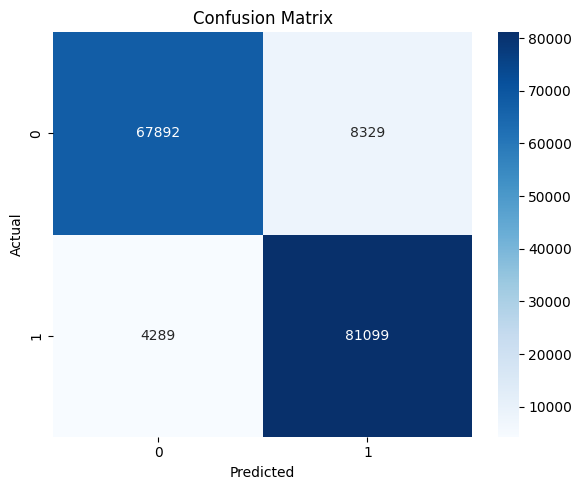

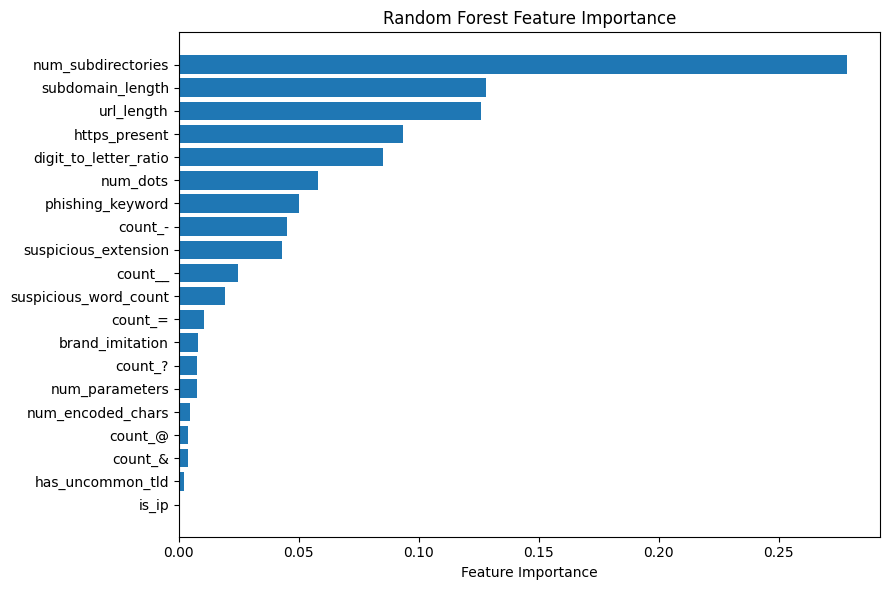

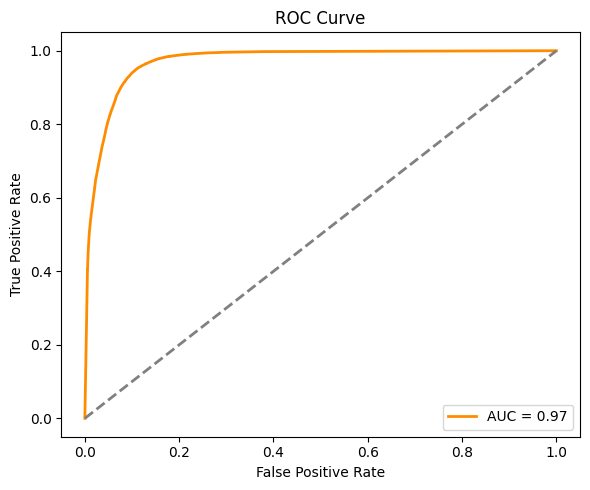

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)

df_details = pd.read_csv("enhanced87.csv")        
df_labels = pd.read_csv("cleaned_dataset.csv")     
assert len(df_features) == len(df_labels), "Datasets must be the same length"
df_features["status"] = df_labels["status"].astype(int).values
feature_cols = [
    'url_length', 'num_dots', 'num_parameters', 'num_encoded_chars',
    'count_@', 'count_-', 'count__', 'count_=', 'count_&', 'count_?',
    'digit_to_letter_ratio', 'subdomain_length', 'is_ip', 'phishing_keyword',
    'has_uncommon_tld', 'suspicious_word_count', 'brand_imitation',
    'num_subdirectories', 'suspicious_extension', 'https_present'
]
X = df_features[feature_cols]
y = df_features["status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
df_features["predicted_status"] = rf_model.predict(X)
df_features.to_csv("phishing_predictions.csv", index=False)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
sorted_idx = np.argsort(importances)

plt.figure(figsize=(9, 6))
plt.barh([feature_cols[i] for i in sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


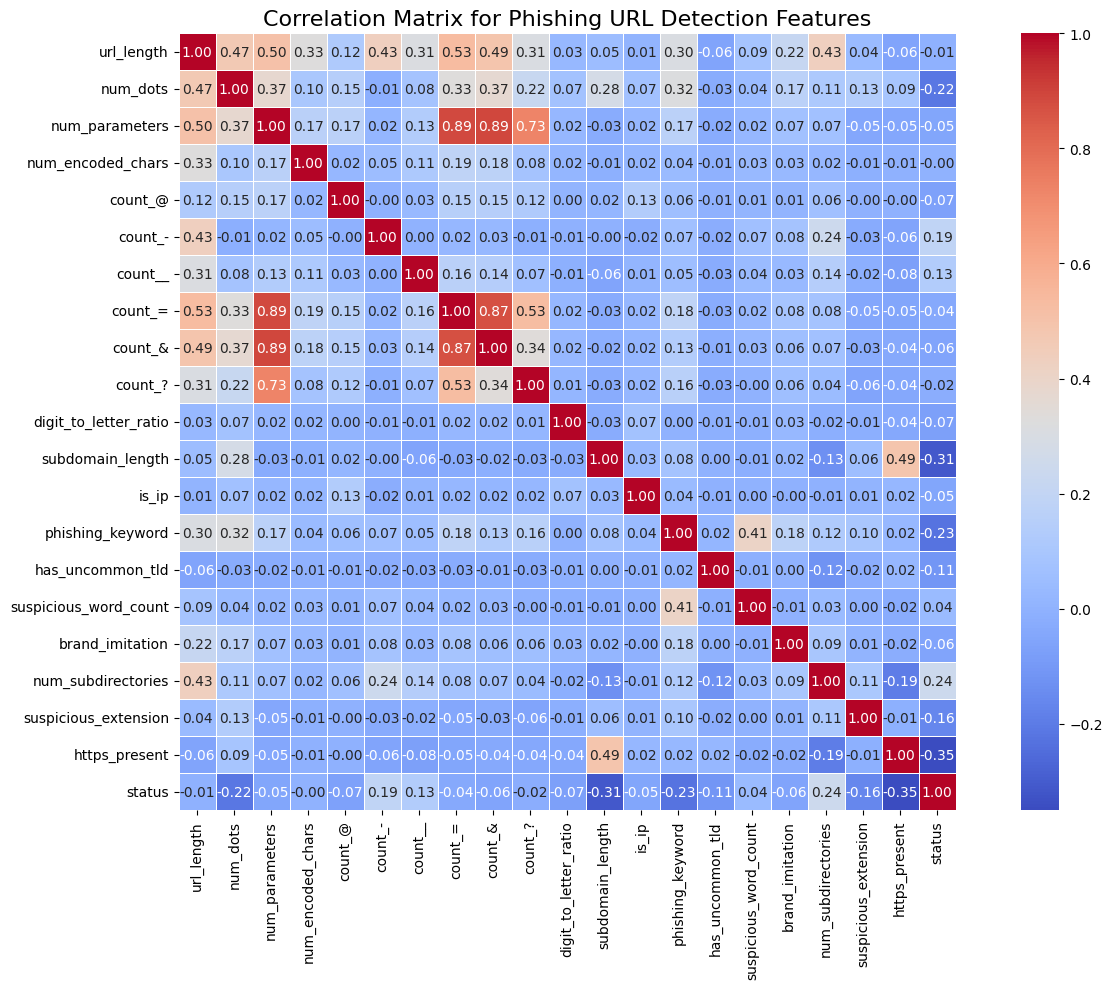

In [3]:
dataset = pd.read_csv("main_dataset_with_status.csv")  
if 'url' in df.columns:
    dataset = df.drop(columns=['url'])
dataset = df.apply(pd.to_numeric, errors='coerce')
dataset = df.dropna()
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix for Phishing URL Detection Features", fontsize=16)
plt.tight_layout()
plt.show()


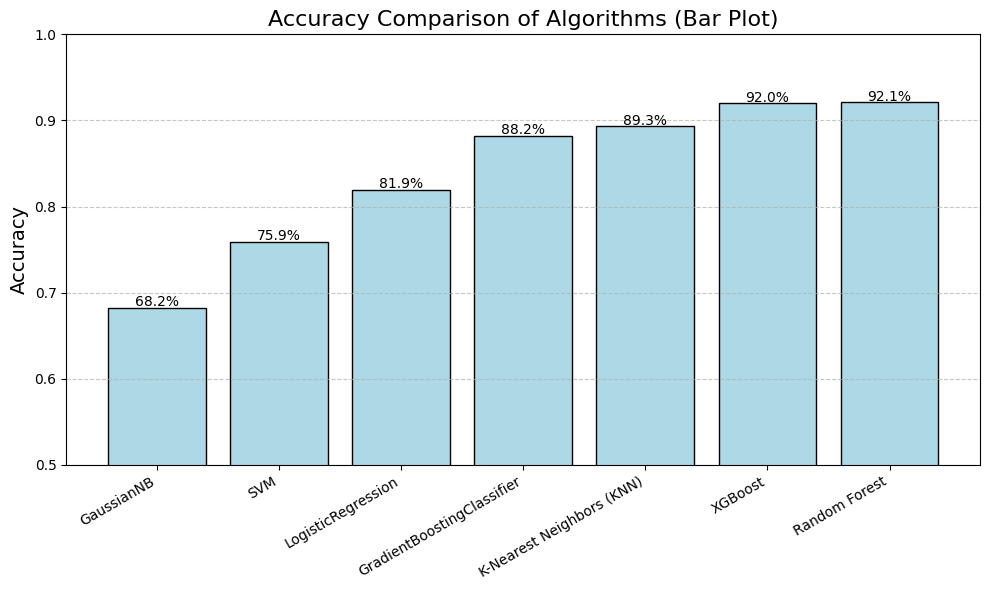

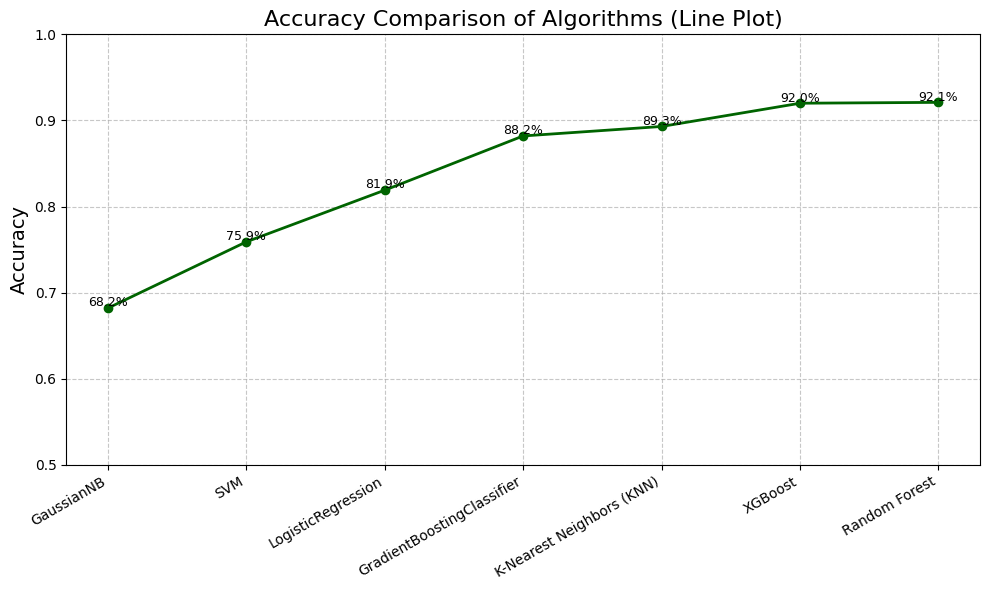

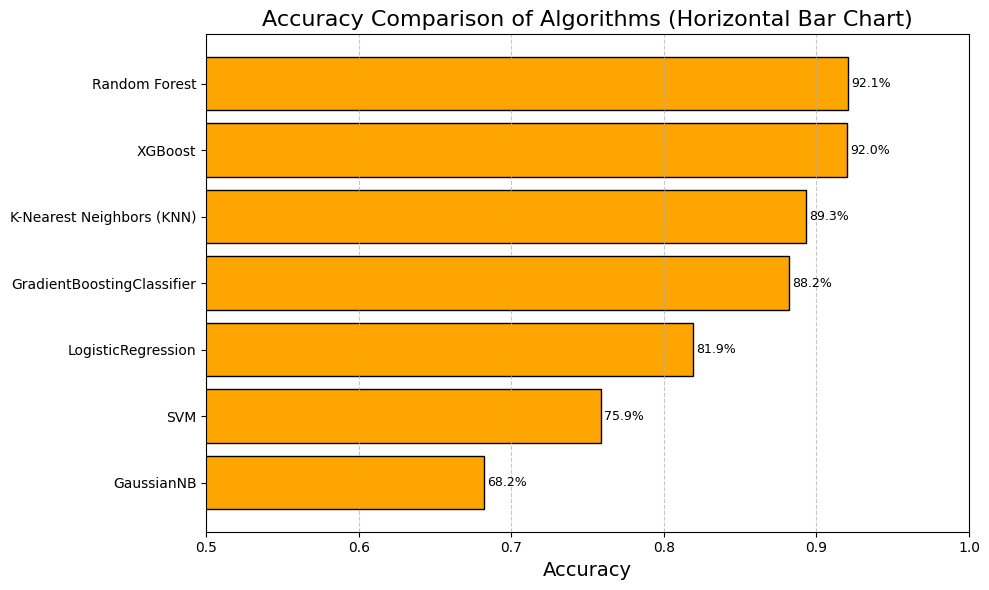

In [7]:
algorithms = [
    "GaussianNB",
    "SVM",
    "LogisticRegression",
    "GradientBoostingClassifier",
    "K-Nearest Neighbors (KNN)",
    "XGBoost",
    "Random Forest"
]

accuracies = [
    0.682, 
    0.759, 
    0.819,  
    0.882,  
    0.893,  
    0.920,  
    0.921   
    
]
df_accuracy = pd.DataFrame({"Algorithm": algorithms, "Accuracy": accuracies})
df_accuracy = df_accuracy.sort_values(by="Accuracy")
plt.figure(figsize=(10, 6))
bars = plt.bar(df_accuracy["Algorithm"], df_accuracy["Accuracy"], color='lightblue', edgecolor='black')

for bar, acc in zip(bars, df_accuracy["Accuracy"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, f"{acc*100:.1f}%", ha='center', fontsize=10)

plt.title("Accuracy Comparison of Algorithms (Bar Plot)", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(df_accuracy["Algorithm"], df_accuracy["Accuracy"], marker='o', color='darkgreen', linestyle='-', linewidth=2)
for x, y in zip(df_accuracy["Algorithm"], df_accuracy["Accuracy"]):
    plt.text(x, y+0.002, f"{y*100:.1f}%", ha='center', fontsize=9)

plt.title("Accuracy Comparison of Algorithms (Line Plot)", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
bars = plt.barh(df_accuracy["Algorithm"], df_accuracy["Accuracy"], color='orange', edgecolor='black')

for bar, acc in zip(bars, df_accuracy["Accuracy"]):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, f"{acc*100:.1f}%", va='center', fontsize=9)

plt.title("Accuracy Comparison of Algorithms (Horizontal Bar Chart)", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.xlim(0.5, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


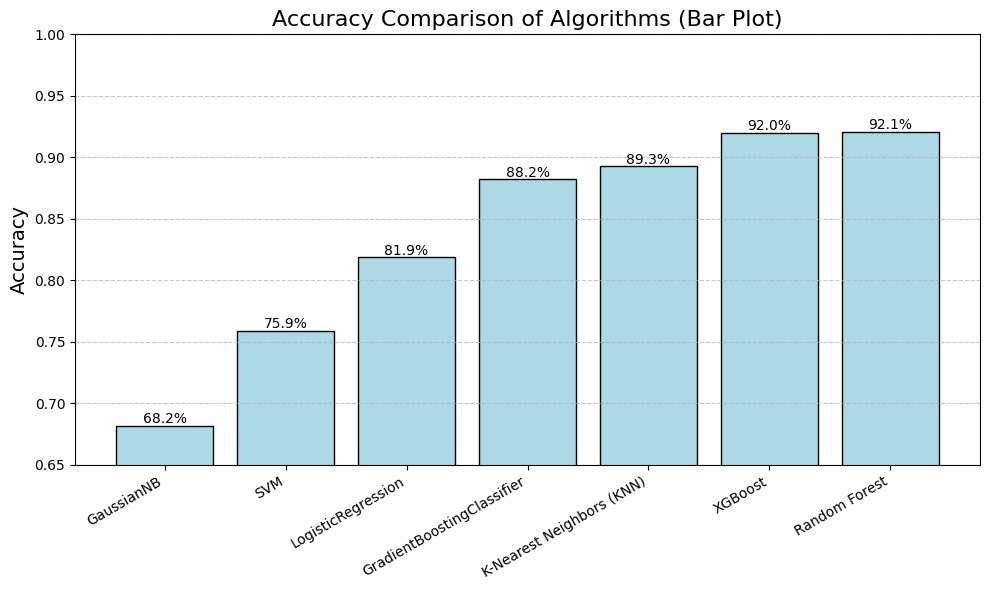

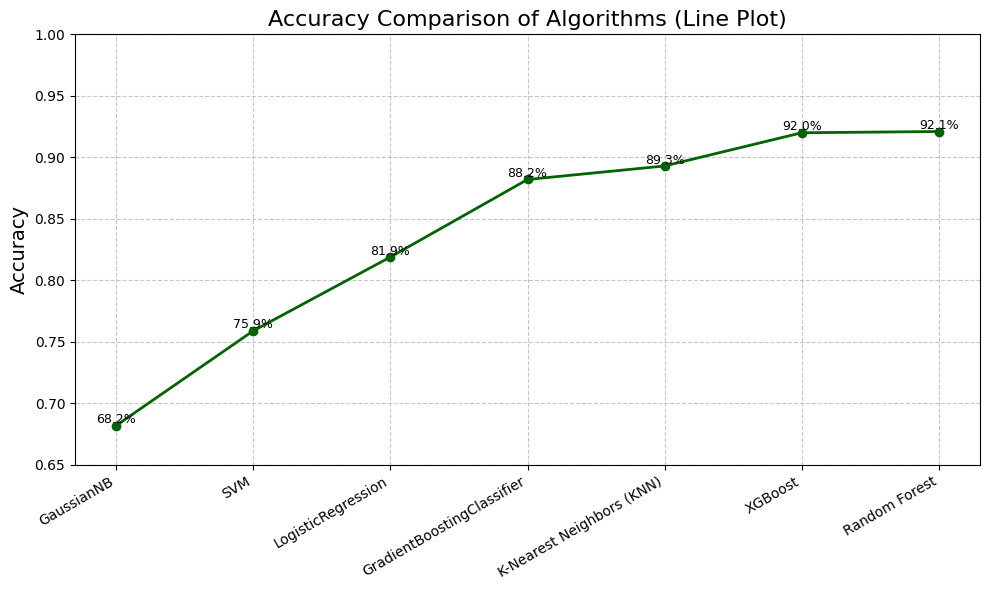

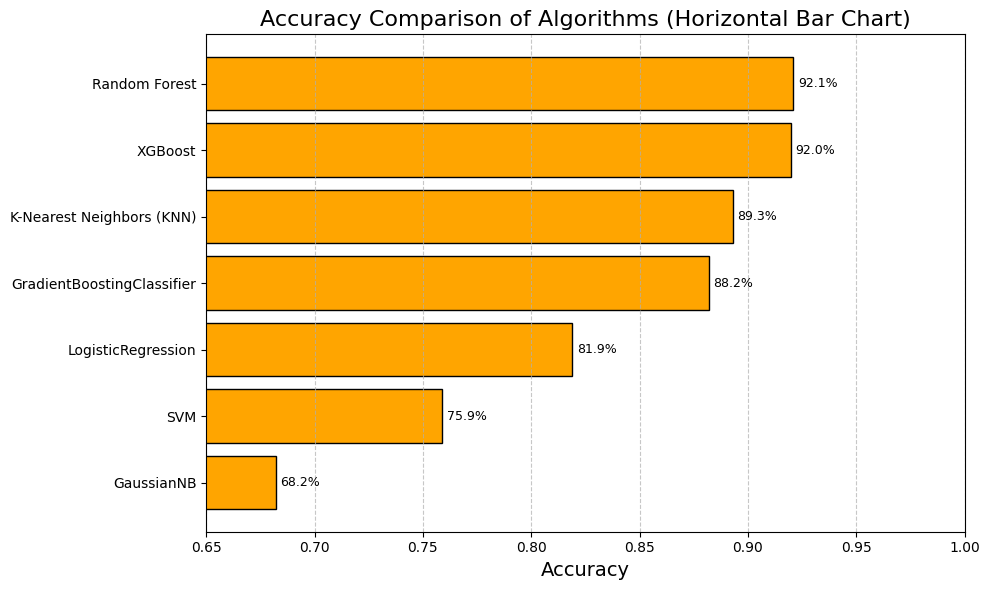

In [8]:
algorithms = [
    "GaussianNB",
    "SVM",
    "LogisticRegression",
    "GradientBoostingClassifier",
    "K-Nearest Neighbors (KNN)",
    "XGBoost",
    "Random Forest"
]

accuracies = [
    0.682,  
    0.759,  
    0.819, 
    0.882,  
    0.893,  
    0.920,  
    0.921 
]
df_accuracy = pd.DataFrame({"Algorithm": algorithms, "Accuracy": accuracies})
df_accuracy = df_accuracy.sort_values(by="Accuracy")  
plt.figure(figsize=(10, 6))
bars = plt.bar(df_accuracy["Algorithm"], df_accuracy["Accuracy"], color='lightblue', edgecolor='black')

for bar, acc in zip(bars, df_accuracy["Accuracy"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, f"{acc*100:.1f}%", ha='center', fontsize=10)

plt.title("Accuracy Comparison of Algorithms (Bar Plot)", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylim(0.65, 1.0)  # ✅ Fixed range to show all bars
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(df_accuracy["Algorithm"], df_accuracy["Accuracy"], marker='o', color='darkgreen', linestyle='-', linewidth=2)
for x, y in zip(df_accuracy["Algorithm"], df_accuracy["Accuracy"]):
    plt.text(x, y+0.002, f"{y*100:.1f}%", ha='center', fontsize=9)

plt.title("Accuracy Comparison of Algorithms (Line Plot)", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylim(0.65, 1.0)  # ✅ Fix range
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
bars = plt.barh(df_accuracy["Algorithm"], df_accuracy["Accuracy"], color='orange', edgecolor='black')

for bar, acc in zip(bars, df_accuracy["Accuracy"]):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, f"{acc*100:.1f}%", va='center', fontsize=9)

plt.title("Accuracy Comparison of Algorithms (Horizontal Bar Chart)", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.xlim(0.65, 1.0)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


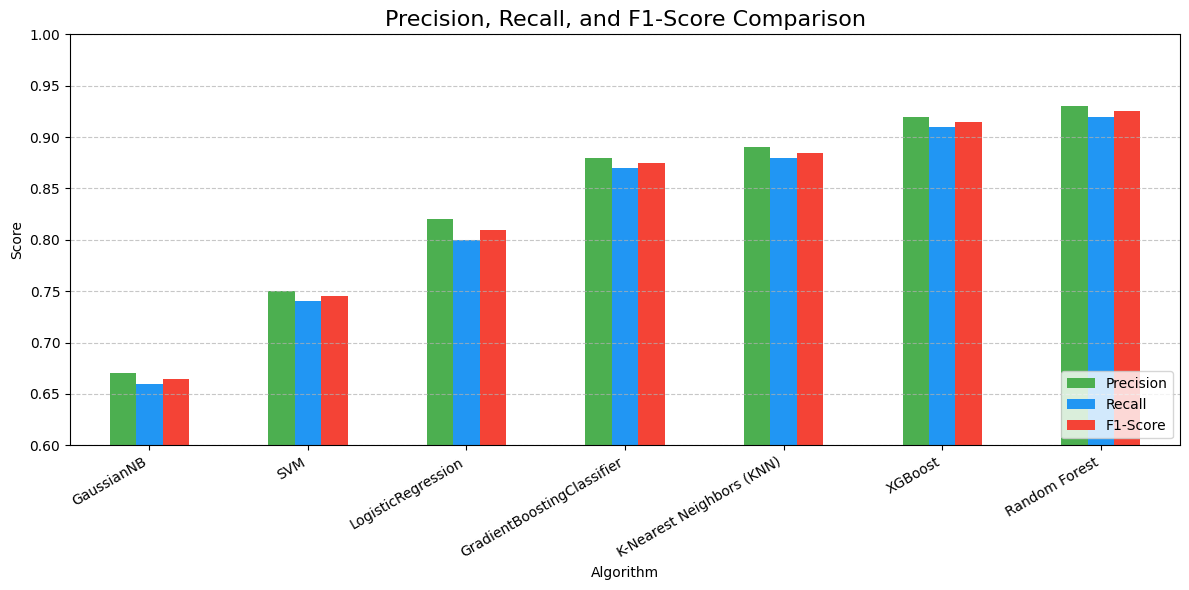

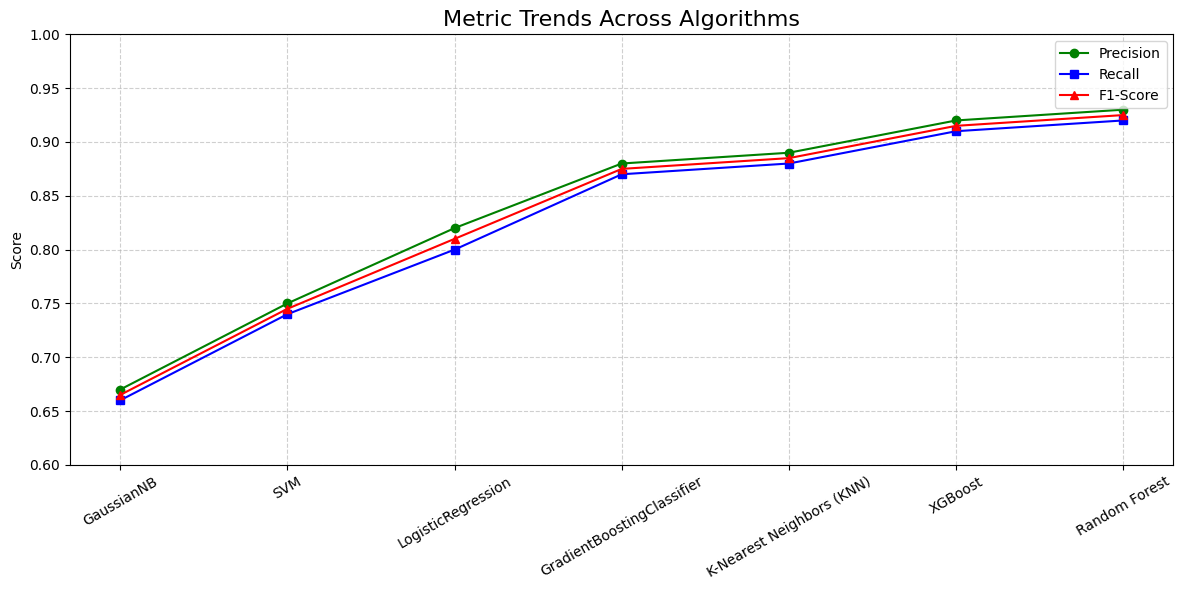

In [9]:
algorithms = [
    "GaussianNB",
    "SVM",
    "LogisticRegression",
    "GradientBoostingClassifier",
    "K-Nearest Neighbors (KNN)",
    "XGBoost",
    "Random Forest"
]
precision = [0.67, 0.75, 0.82, 0.88, 0.89, 0.92, 0.93]
recall    = [0.66, 0.74, 0.80, 0.87, 0.88, 0.91, 0.92]
f1_score  = [0.665, 0.745, 0.81, 0.875, 0.885, 0.915, 0.925]

# Create DataFrame
df_metrics = pd.DataFrame({
    "Algorithm": algorithms,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score
})
df_metrics.set_index("Algorithm").plot(kind='bar', figsize=(12, 6), color=['#4caf50', '#2196f3', '#f44336'])
plt.title("Precision, Recall, and F1-Score Comparison", fontsize=16)
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
plt.xticks(rotation=30, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(algorithms, precision, marker='o', label="Precision", color='green')
plt.plot(algorithms, recall, marker='s', label="Recall", color='blue')
plt.plot(algorithms, f1_score, marker='^', label="F1-Score", color='red')
plt.title("Metric Trends Across Algorithms", fontsize=16)
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\vakap\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9214471787192704

Confusion Matrix:
 [[67267  8938]
 [ 3757 81649]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     76205
           1       0.90      0.96      0.93     85406

    accuracy                           0.92    161611
   macro avg       0.92      0.92      0.92    161611
weighted avg       0.92      0.92      0.92    161611



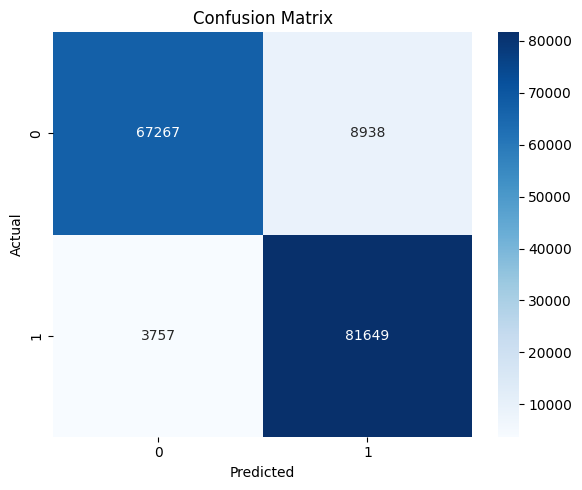

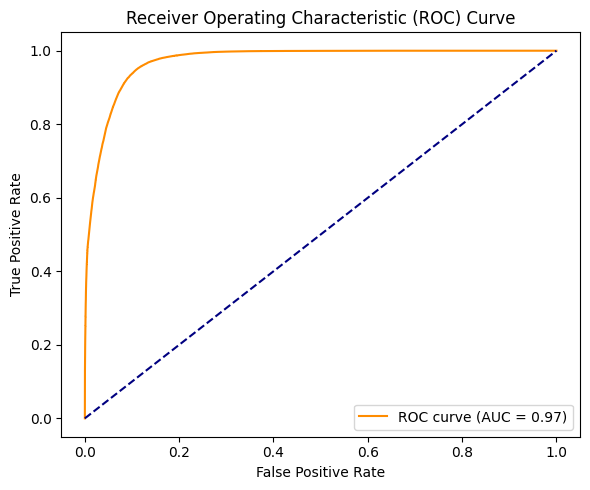

<Figure size 1000x600 with 0 Axes>

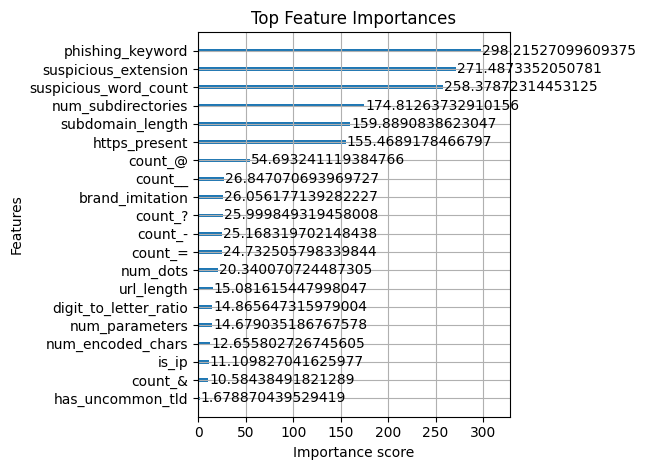

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import shuffle
from xgboost import XGBClassifier, plot_importance
dataset = pd.read_csv("main_dataset_with_status.csv")
details = [
    'url_length', 'num_dots', 'num_parameters', 'num_encoded_chars',
    'count_@', 'count_-', 'count__', 'count_=', 'count_&', 'count_?',
    'digit_to_letter_ratio', 'subdomain_length', 'is_ip',
    'phishing_keyword', 'has_uncommon_tld', 'suspicious_word_count',
    'brand_imitation', 'num_subdirectories', 'suspicious_extension',
    'https_present'
]

X = df[features]
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=3,
    scoring='accuracy', verbose=1, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plot_importance(best_model, max_num_features=20, importance_type='gain')
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()
